In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

### 简单拆分训练集和测试集

In [3]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)

prediction = knn.predict(test_x)
print(knn.score(test_x,test_y))

0.9777777777777777


### new cross_validation

In [4]:
from sklearn.model_selection import cross_val_score
knn2 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn2,x,y,cv=5,scoring="accuracy")  #cv=5表示分成5组不同的测试集和训练集 
print(scores)   #cv=5 5组，每一组的分数
print("Mean score =",scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean score = 0.9733333333333334


### 调试找出最好的n_neighbors

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


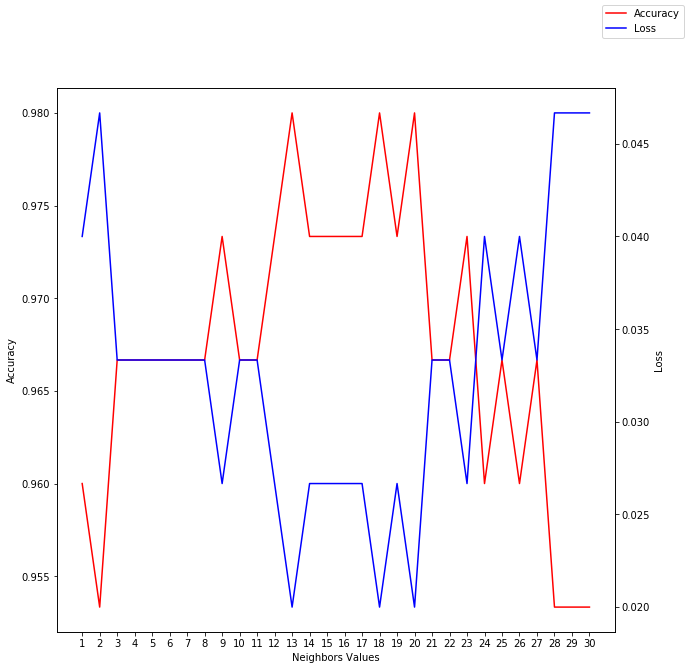

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import SCORERS
k_range = range(1,31)
k_scores = []
k_losses = []
print(SCORERS.keys())
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #补充知识，获取loss
    loss = -cross_val_score(knn,x,y,cv=10,scoring="neg_mean_squared_error")
    scores = cross_val_score(knn,x,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())
    k_losses.append(loss.mean())

fig = plt.figure(figsize=(10,10))
plt.plot(k_range,k_scores,color='r',label='Accuracy')
plt.xlabel("Neighbors Values")
plt.ylabel("Accuracy")
plt.xticks(k_range)

ax1 = fig.get_axes()[0]   #plt.gca()
ax2 = ax1.twinx()
ax2.plot(k_range,k_losses,color='b',label='Loss')
ax2.set_ylabel("Loss")
fig.legend()

plt.show()